## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

In [3]:
# Checking the number of mice in the DataFrame.
total_mice = mouse_data_complete["Mouse ID"].nunique()
print(f"There are {total_mice} total mice in the DataFrame.")

There are 249 total mice in the DataFrame.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_complete["Mouse ID"].value_counts().head()

g989    13
c758    10
l661    10
t198    10
j119    10
Name: Mouse ID, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study = mouse_data_complete.set_index("Mouse ID")
bad_mouse = mouse_study.loc["g989", :]
bad_mouse

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_complete = mouse_data_complete[mouse_data_complete["Mouse ID"] != "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_data_complete["Mouse ID"].value_counts().head()

c758    10
t198    10
l509    10
j755    10
i334    10
Name: Mouse ID, dtype: int64

In [8]:
# Display Clean DataFrame
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

tumor_median = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

tumor_var = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

tumor_std = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

tumor_sem = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_var, "Standard Deviation": tumor_std, "SEM": tumor_sem})
# Display Summary Statistics
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [11]:
# Filter the DataFrame down only to those columns to chart
mouse_and_timepoint = mouse_data_complete["Drug Regimen"].value_counts()

<IPython.core.display.Javascript object>


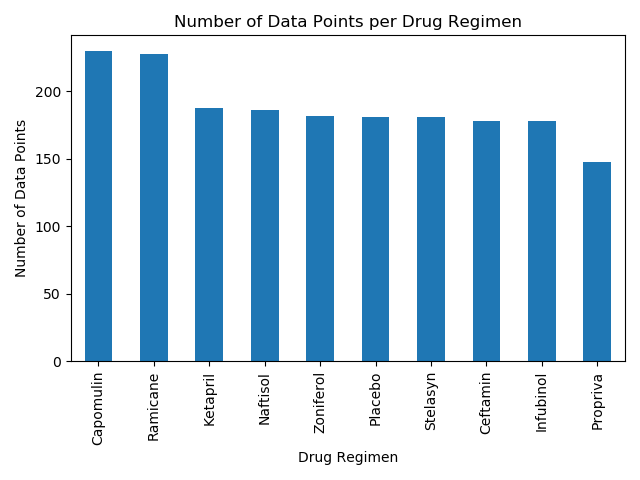

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# Use DataFrame.plot() in order to create a bar chart of the data
mouse_and_timepoint.plot(kind="bar")

# Set title, x labels, and y labels for the chart
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# Display Chart with Tight Layout
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


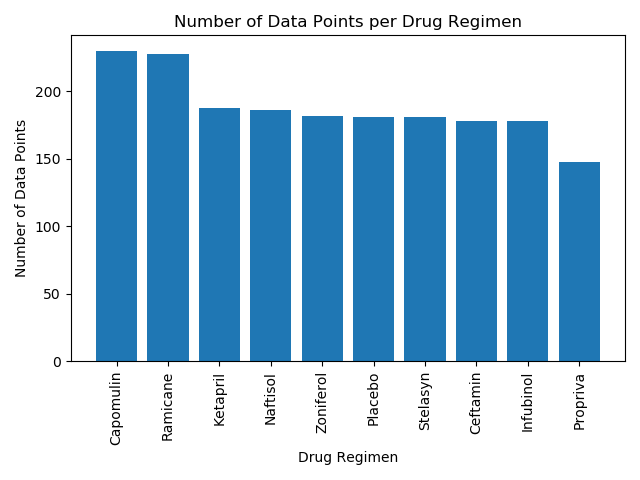

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# Set x axis
x_axis = list(range(10))

# Plot Figure using pyplot
plt.figure()
plt.bar(x_axis, mouse_and_timepoint)

# Set xtixks, title, x labels, and y labels for the chart
plt.xticks(x_axis, mouse_and_timepoint.index, rotation="vertical")
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# Display Chart with Tight Layout
plt.show()
plt.tight_layout()

## Pie Plots

In [14]:
# Group Mice by Sex
pie = mouse_data_complete.groupby("Sex")["Mouse ID"].nunique()

# Set Colors for Pie Graphs
colors = ["tab:orange", "tab:blue"]

<IPython.core.display.Javascript object>


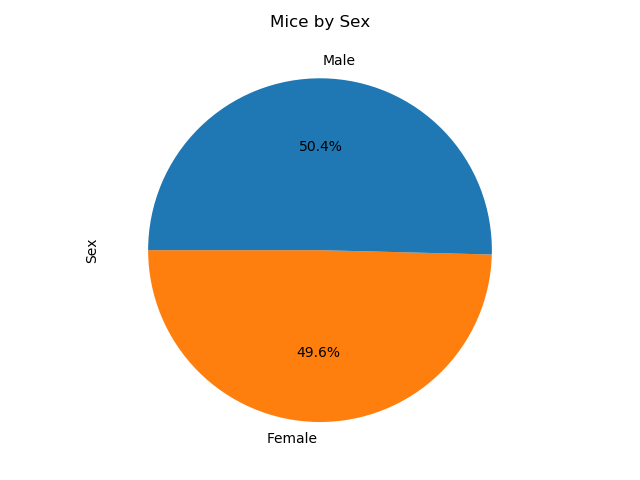

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure()
pie.plot(kind="pie", autopct="%1.1f%%", startangle=180, colors=colors)


# Set title and y labels
plt.title("Mice by Sex")
plt.ylabel("Sex")

# Display Chart with Tight Layout
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


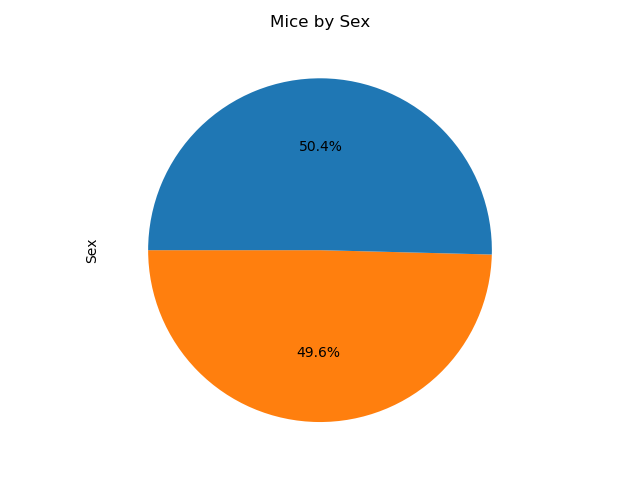

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()
plt.pie(pie, autopct="%1.1f%%", startangle=180, colors=colors)

# Set title and y labels
plt.title("Mice by Sex")
plt.ylabel("Sex")

# Display Chart with Tight Layout
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Group by Mouse ID and their Final Timepoint
final_timepoint = mouse_data_complete.groupby("Mouse ID")["Timepoint"].max()

# Create DataFrame
final_timepoint = pd.DataFrame(final_timepoint)

# Merge New DataFrame with the Complete Data 
final_timepoint = pd.merge(final_timepoint, mouse_data_complete, how="left", on=["Mouse ID", "Timepoint"])

In [18]:
# Create Function to find Outliers
def get_outliers(drug, upper_bound, lower_bound):
    outliers = []
     
    for index, row in drug[["Mouse ID", "Tumor Volume (mm3)"]].iterrows():
        volume = row["Tumor Volume (mm3)"]
        if(volume > upper_bound or volume < lower_bound):
            outliers.append(row["Mouse ID"])
    return outliers

In [19]:
# Create a Function to calculate the IQR and quantitatively determine if there are any potential outliers.
def get_drug_statistics(drug_name):
    drug = final_timepoint[final_timepoint["Drug Regimen"] == drug_name]

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = get_outliers(drug, upper_bound, lower_bound)

    print(f"The lower quartile of {drug_name} is: {lowerq}")
    print(f"The upper quartile of {drug_name} is: {upperq}")
    print(f"The interquartile range of {drug_name} is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    if(not outliers):
        print("There are no outliers.")
    else:
        print(f"Mouse {', '.join(outliers)} could be an outliier.")

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for Capomulin. 
get_drug_statistics("Capomulin")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no outliers.


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for Ramicane. 
get_drug_statistics("Ramicane")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no outliers.


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for Infubinol. 
get_drug_statistics("Infubinol")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Mouse c326 could be an outliier.


In [23]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for Ceftamin. 
get_drug_statistics("Ceftamin")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
There are no outliers.


<IPython.core.display.Javascript object>


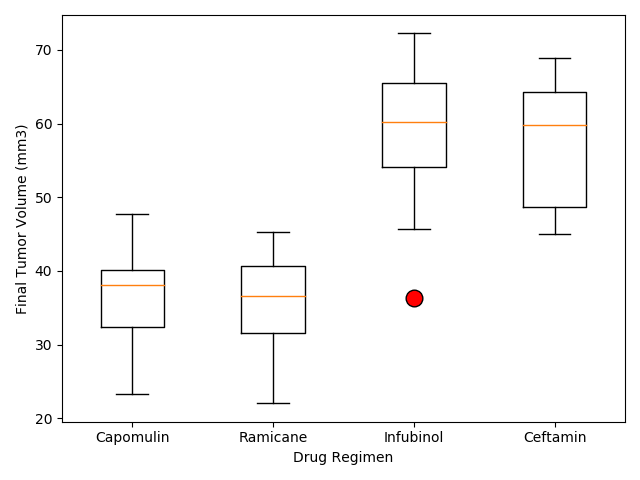

In [24]:
# Create Dictionary for Tumor Volume by Drug Regimen
capomulin = final_timepoint[final_timepoint["Drug Regimen"] == "Capomulin"]
ramicane = final_timepoint[final_timepoint["Drug Regimen"] == "Ramicane"]
infubinol = final_timepoint[final_timepoint["Drug Regimen"] == "Infubinol"]
ceftamin = final_timepoint[final_timepoint["Drug Regimen"] == "Ceftamin"]
box_dict = {"Capomulin": capomulin["Tumor Volume (mm3)"], "Ramicane": ramicane["Tumor Volume (mm3)"], "Infubinol": infubinol["Tumor Volume (mm3)"], "Ceftamin": ceftamin["Tumor Volume (mm3)"]}

# Designate Features of Outliers
outlier = dict(marker='o', markerfacecolor="red", markeredgecolor="black", markersize=12)

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(box_dict.values(), flierprops=outlier)

# Set xticklabels, x labels, and y labels
ax.set_xticklabels(box_dict.keys())
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")

# Display Chart with Tight Layout
plt.show()
plt.tight_layout()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


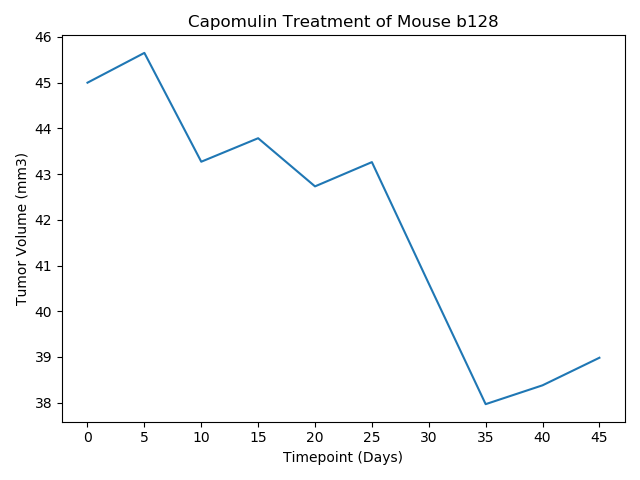

In [33]:
# Select a Mouse
mouse = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "b128"]

# Find the Selected Mouse's Timepoints and Tumor Volumes
mouse_timepoint = mouse["Timepoint"].values
mouse_tumor = mouse["Tumor Volume (mm3)"].values

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.figure()
plt.plot(mouse_timepoint, mouse_tumor)

# Set xtixks, title, x labels, and y labels for the chart
plt.xticks(mouse_timepoint)
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Display Chart with Tight Layout
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


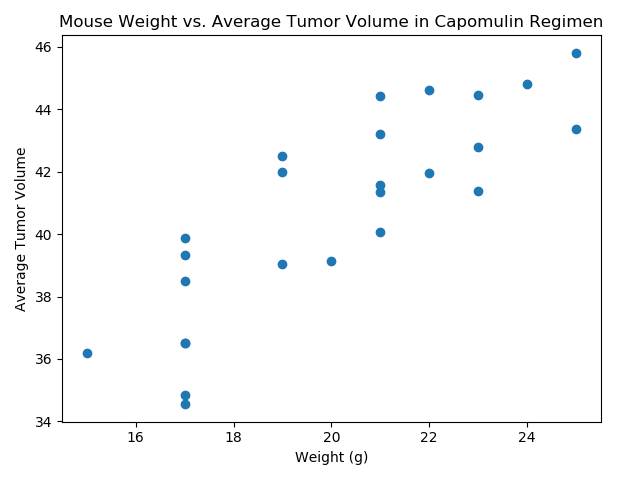

In [26]:
# Select All Mice with Capomulin Drug Regimen
capomulin_mice = mouse_data_complete[mouse_data_complete["Drug Regimen"] == "Capomulin"]

# Find the Average Tumor Volume and Weight of the Selected Group
capomulin_average = capomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_weight = capomulin_mice.groupby("Mouse ID")["Weight (g)"].mean()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure()
plt.scatter(capomulin_weight,capomulin_average)

# Set title, x labels, and y labels for the chart
plt.title("Mouse Weight vs. Average Tumor Volume in Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")

# Display Chart with Tight Layout
plt.show()
plt.tight_layout()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


<IPython.core.display.Javascript object>


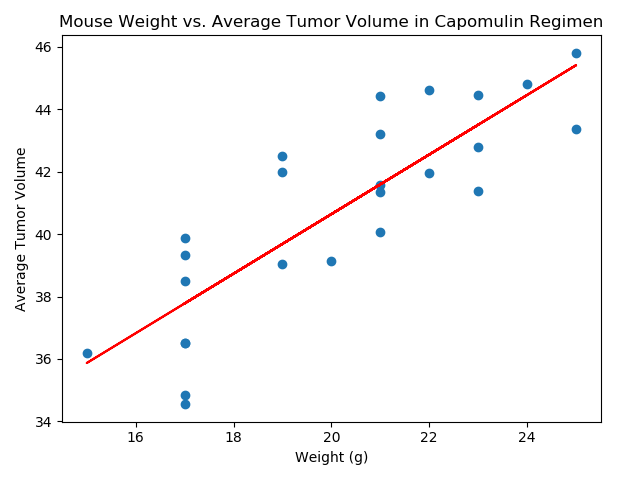

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(capomulin_weight,capomulin_average)[0],2)}")

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure()
plt.scatter(capomulin_weight,capomulin_average)

# Create Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weight,capomulin_average)
regress_values = capomulin_weight * slope + intercept
plt.plot(capomulin_weight,regress_values,"r-")

# Set title, x labels, and y labels for the chart
plt.title("Mouse Weight vs. Average Tumor Volume in Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")

# Display Chart with Tight Layout
plt.show()
plt.tight_layout()

In [28]:
# Specify Output Location 
output = "observable_trends.txt"

In [29]:
# Write Observable Trends to Text File
with open(output, "w",) as txtfile:
    txtfile.write("Observable Trends:\n")
    txtfile.write("1. There is a strong positive correlation between mouse weight and their respective tumor volume, in the Capomulin regimen.\n")
    txtfile.write("2. The Capomullin regimen had the most Timepoint data, therefore the mice, as a whole, in that regimen lived the longest.\n")
    txtfile.write("3. The Ramicane regimen generated the lowest median tumor volume, across all regimens.\n")